![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/emotion_classification.ipynb)


# Sentiment Classification with NLU for Twitter

# 1. Setup Java 8 and NLU

In [1]:
!wget https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh -O - | bash

import nlu

--2021-05-04 00:40:04--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-04 00:40:04 (1.31 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 65kB/s 
     |████████████████████████████████| 153kB 814kB/s 
     |████████████████████████████████| 204kB 719kB/s 
     |████████████████████████████████| 204kB 1.1MB/s 


# 2. Load pipeline and get sample predictions

In [2]:
import nlu
sentiment_pipe  = nlu.load('emotion')
sentiment_pipe.predict('@elonmusk Tesla stock price is too high imo')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,emotion_confidence_confidence,text,origin_index,emotion,document,sentence_embedding_tfhub_use,sentence
0,[0.9999976],@elonmusk Tesla stock price is too high imo,8589934592,[sadness],@elonmusk Tesla stock price is too high imo,"[[0.08604438602924347, 0.04703635722398758, -0...",[@elonmusk Tesla stock price is too high imo]


# 3. Define a list of String for predictions

In [3]:
example_tweets = [
"@VirginAmerica Hi, Virgin! I'm on hold for 40-50 minutes -- are there any earlier flights from LA to NYC tonight; earlier than 11:50pm?",
"@VirginAmerica is there special assistance if I travel alone w/2 kids and 1 infant? Priority boarding?",
"@VirginAmerica thank you for checking in. tickets are purchased and customer is happy", 
"@VirginAmerica is your website ever coming back online?",
"@VirginAmerica  - Is Flight 713 from Love Field to SFO definitely Cancelled Flightled for Monday, February 23?",
"@VirginAmerica Is flight 0769 out of LGA to DFW on time?",
"@VirginAmerica my drivers license is expired by a little over a month. Can I fly Friday morning using my expired license?",
"@VirginAmerica having problems Flight Booking Problems on the web site. keeps giving me an error and to contact by phone.  phone is 30 minute wait.",
"@VirginAmerica How do I reschedule my Cancelled Flightled flights online? The change button is greyed out!",
"@VirginAmerica I rang, but there is a wait for 35 minutes!! I can book the same ticket through a vendor, fix your site",
"@VirginAmerica got a flight (we were told) for 4:50 today..,checked my email and its for 4;50 TOMORROW. This is unacceptable.",
"@VirginAmerica our flight into lga was Cancelled Flighted. We're stuck in Dallas. I called to reschedule, told I could get a flight for today...(1/2)",
"@virginamerica why don't any of the pairings include red wine?! Only white is offered :( #redwineisbetter"
]


# 4. Get predictions for list of strings

In [4]:
sentiment_pipe.predict(example_tweets)

,emotion_confidence_confidence,origin_index,emotion,document,sentence_embedding_tfhub_use,sentence
0,"[0.92608595, 0.92608595]",0,"[sadness, sadness]","@VirginAmerica Hi, Virgin! I'm on hold for 40-...","[[0.034392621368169785, 0.04743622615933418, -...","[@VirginAmerica Hi, Virgin!, I'm on hold for ..."
1,"[0.9875567, 0.9875567]",1,"[surprise, surprise]",@VirginAmerica is there special assistance if ...,"[[-0.07632657885551453, -0.00686881598085165, ...",[@VirginAmerica is there special assistance if...
2,[0.99999917],2,[joy],@VirginAmerica thank you for checking in. tick...,"[[-0.0030431197956204414, -0.02072464115917682...",[@VirginAmerica thank you for checking in. tic...
3,[0.9928368],3,[sadness],@VirginAmerica is your website ever coming bac...,"[[-0.002968168817460537, -0.000566655478905886...",[@VirginAmerica is your website ever coming ba...
4,[0.9349201],4,[joy],@VirginAmerica - Is Flight 713 from Love Field...,"[[-0.001066288212314248, 0.07673103362321854, ...",[@VirginAmerica - Is Flight 713 from Love Fiel...
5,[0.9999956],5,[joy],@VirginAmerica Is flight 0769 out of LGA to DF...,"[[0.027866005897521973, 0.07844573259353638, -...",[@VirginAmerica Is flight 0769 out of LGA to D...
6,"[0.99150836, 0.99150836]",6,"[joy, joy]",@VirginAmerica my drivers license is expired b...,"[[-0.0589623749256134, -0.06640151143074036, -...",[@VirginAmerica my drivers license is expired ...
7,"[0.9313905, 0.9313905]",7,"[joy, joy]",@VirginAmerica having problems Flight Booking ...,"[[-0.007869902998209, 0.06951839476823807, -0....",[@VirginAmerica having problems Flight Booking...
8,"[0.94544274, 0.94544274]",8,"[sadness, sadness]",@VirginAmerica How do I reschedule my Cancelle...,"[[-0.047210294753313065, 0.0797676295042038, -...",[@VirginAmerica How do I reschedule my Cancell...
9,"[0.99922204, 0.99922204]",9,"[joy, joy]","@VirginAmerica I rang, but there is a wait for...","[[-0.004450463689863682, 0.06487753242254257, ...","[@VirginAmerica I rang, but there is a wait fo..."


# Plot emotion distribution

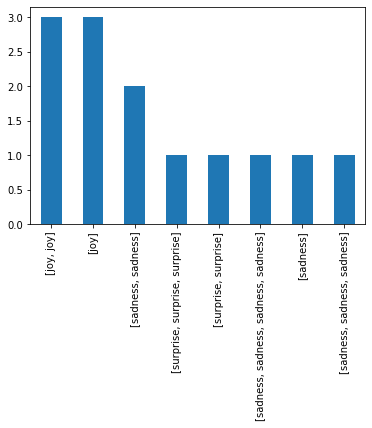

In [5]:
predictions = sentiment_pipe.predict(example_tweets)
predictions.emotion.value_counts().plot.bar()